In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train_1 = pd.read_csv('ACT1_Anova_50.csv')

In [3]:
train_1.head(5)

,Unnamed: 0,D_297,D_298,D_299,D_385,D_395,D_466,D_467,D_468,D_476,...,D_4860,D_4941,D_5522,D_5523,D_5525,D_5526,D_5607,D_7234,D_7235,Act
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,3,2,6.0179
1,1,0,0,0,0,0,3,1,2,0,...,0,0,1,1,0,0,0,0,0,4.3003
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,3,5,5.2697
3,3,1,0,1,0,0,10,6,7,0,...,0,1,2,4,1,2,1,1,2,6.1797
4,4,0,0,0,7,0,0,0,0,0,...,0,0,2,3,0,0,1,4,3,4.3003


In [4]:
from sklearn.model_selection import train_test_split
import numpy as np
y = train_1['Act'].values
train_1 = train_1.drop(['Act', 'Unnamed: 0'], axis = 1)
x = train_1.values
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.20, random_state = 0)
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.25, random_state=0)


In [5]:
print(np.shape(Y_train), np.shape(X_train), np.shape(Y_test), np.shape(X_test))
Y_train = np.reshape(Y_train,(len(Y_train),1))
Y_test = np.reshape(Y_test,(len(Y_test),1))


(22344,) (22344, 50) (7449,) (7449, 50)


In [6]:
def r_square(X, Y):
    """ r^2 value defined by the competition host, r^2 = 1 indicates 100% prediction accuracy
    """
    avx = np.mean(X)
    avy = np.mean(Y)
    sum1, sumx, sumy = 0, 0, 0
    for i in range(len(X)):
        sum1 += (X[i] - avx)*(Y[i] - avy)
        sumx += (X[i] - avx)*(X[i] - avx)
        sumy += (Y[i] - avy)*(Y[i] - avy)
    print(len(X), sum1, sumx, sumy)
    return sum1*sum1/(sumx*sumy)

In [7]:
from keras import backend as K
#Keras R_2 function
R_2 = []
def coeff_determination(y_true, y_pred):
    SS_res =  K.sum(K.square( y_true-y_pred )) 
    SS_tot = K.sum(K.square( y_true - K.mean(y_true) ) ) 
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )

Using TensorFlow backend.


In [8]:
from sklearn.metrics import make_scorer
#Keras MAPE function
MAPE = []
def mean_ape(y_true, y_pred):
    return K.mean(K.abs((y_true-y_pred)/y_true))*100
#Scikit learn mape function
def mean_apes(y_true, y_pred):
    return np.mean(np.abs((y_true-y_pred)/y_true))*100
mape_func = make_scorer(mean_apes)

In [9]:
from tensorflow.keras.models import Sequential
import keras
from tensorflow.keras.layers import Dense
from keras.optimizers import Adam 
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor

In [17]:
#Keras model
for epochs in [150]:
    for batch in [60]:
        K.clear_session()
        model = keras.models.Sequential();
        model.add(keras.layers.core.Dense(units = 40, activation='relu', input_dim = 50));
        model.add(keras.layers.core.Dense(units=20, activation = 'relu'))
        model.add(keras.layers.core.Dense(1, activation = 'relu'));
        adam = Adam(lr=0.01, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False);
        model.compile(loss="mean_squared_error", optimizer=adam, metrics = [coeff_determination, mean_ape,'mae']);
        print(model.summary(), 'Epochs = ', epochs, 'Batch =', batch);
        history = model.fit(X_train, Y_train, epochs = epochs, batch_size= batch, verbose = 1);
        #print(model.evaluate(X_val, Y_val,verbose=False)[1], )

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 40)                2040      
_________________________________________________________________
dense_2 (Dense)              (None, 20)                820       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 21        
Total params: 2,881
Trainable params: 2,881
Non-trainable params: 0
_________________________________________________________________
None Epochs =  150 Batch = 60
Epoch 1/150
22344/22344 [==============================] - 1s 36us/step - loss: 0.7613 - coeff_determination: -1.0283 - mean_ape: 12.5500 - mean_absolute_error: 0.6070
Epoch 2/150
22344/22344 [==============================] - 0s 22us/step - loss: 0.3021 - coeff_determination: 0.2224 - mean_ape: 8.0095 - mean_absolute_error: 0.3962
Epoch 3/150
22344/22344 [===============

22344/22344 [==============================] - 1s 32us/step - loss: 0.1810 - coeff_determination: 0.5270 - mean_ape: 6.0503 - mean_absolute_error: 0.2983
Epoch 94/150
22344/22344 [==============================] - 1s 29us/step - loss: 0.1805 - coeff_determination: 0.5345 - mean_ape: 5.9953 - mean_absolute_error: 0.2961
Epoch 95/150
22344/22344 [==============================] - 1s 27us/step - loss: 0.1788 - coeff_determination: 0.5376 - mean_ape: 5.9974 - mean_absolute_error: 0.2958
Epoch 96/150
22344/22344 [==============================] - 1s 27us/step - loss: 0.1815 - coeff_determination: 0.5315 - mean_ape: 6.0571 - mean_absolute_error: 0.2986
Epoch 97/150
22344/22344 [==============================] - 1s 26us/step - loss: 0.1812 - coeff_determination: 0.5254 - mean_ape: 6.0453 - mean_absolute_error: 0.2983
Epoch 98/150
22344/22344 [==============================] - 1s 27us/step - loss: 0.1822 - coeff_determination: 0.5180 - mean_ape: 6.0564 - mean_absolute_error: 0.2988
Epoch 99/15

In [19]:
print(history.history.keys())

dict_keys(['loss', 'coeff_determination', 'mean_ape', 'mean_absolute_error'])


In [20]:
print(model.evaluate(X_test, Y_test,verbose=False))

[0.23436701563452036, 0.3458592239307154, 6.7505157155201845, 0.33286779241838466]
[0.24324763702984575, 0.33169179834732515, 6.818700839631717, 0.33632399818131964]


In [21]:
Y_predict = model.predict(X_test)

6.8187024818554836

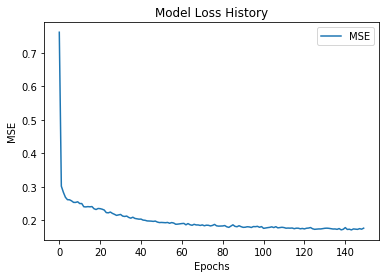

In [24]:
plt.plot(history.history['loss'])
#plt.plot(history.history['mean_ape'])
plt.title('Model Loss History')
plt.ylabel('MSE')
plt.xlabel('Epochs')
plt.legend(['MSE'])


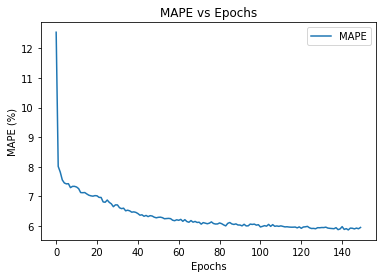

In [25]:
plt.plot(history.history['mean_ape'])
#plt.plot(history.history['mean_ape'])
plt.title('MAPE vs Epochs')
plt.ylabel('MAPE (%)')
plt.xlabel('Epochs')
plt.legend(['MAPE'])


6.552984964228475


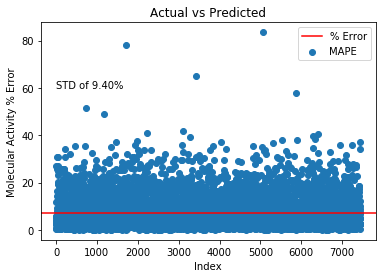

In [60]:
comparison = np.ravel(np.abs((Y_predict-Y_test)/Y_test*100))
abs_comparison = np.abs(comparison)
mask = np.where(abs_comparison>0)
plt.scatter(range(np.shape(mask)[1]), comparison[mask])
plt.axhline(y=mean_apes(Y_predict,Y_test), color='r', linestyle='-')
plt.title('Actual vs Predicted')
plt.ylabel('Molecular Activity % Error')
plt.xlabel('Index')
plt.legend(['% Error', 'MAPE'])
plt.text(0.05, 60, 'STD of 9.40%')
print(comparison.std())

Text(30, 3000, 'STD of 9.40%')

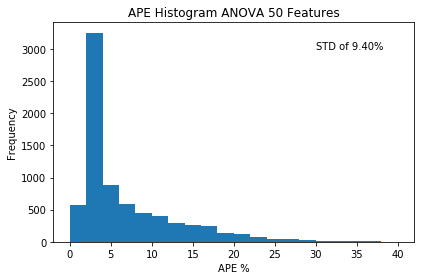

In [64]:
comparison = np.ravel(np.abs((Y_predict-Y_test)/Y_test*100))
abs_comparison = np.abs(comparison)
mask = np.where(abs_comparison>0)
fig, ax= plt.subplots(1, 1,tight_layout=True)
ax.hist(comparison,np.linspace(0,40,21))
ax.set_xlabel('APE %')
ax.set_ylabel('Frequency')
ax.set_title('APE Histogram ANOVA 50 Features')
ax.text(30, 3000)

In [57]:
# exportdata = pd.DataFrame()
# exportdata['loss_anova'] = history.history['loss']
# exportdata['mean_ape'] = history.history['mean_ape']
# exportdata['mean_absolute_error'] = history.history['mean_absolute_error']
# exportdata['coeff_determination'] = history.history['coeff_determination']
# exportdata.to_csv('Anova_data_plots.csv')



